App Reviews Sentiment Analysis is a valuable tool for app developers and businesses to understand user feedback, prioritize feature updates, and maintain a positive user community.

Below is the process we can follow for the task of app reviews sentiment analysis:

1. The first step is to gather a dataset of app reviews.
2. Then, perform EDA by analyzing the length of the reviews and their ratings, etc.
3. Then, label the sentiment data using tools like Textblob or NLTK.
4. Understand the overall distribution of sentiments (positive, negative, neutral) in the dataset.
5. Explore the relationship between the sentiments and the ratings given.
6. Analyze the text of the reviews to identify common themes or words in different sentiment categories.

In [15]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as w
w.filterwarnings("ignore")
plt.style.use("ggplot")

In [3]:
df = pd.read_csv(r"C:\Users\areeb\Desktop\Personal Projects\Data Sets\linkedin-reviews.csv")

In [4]:
df.head()

,Review,Rating
0,Does absolutely nothing for a LinkedIn beginne...,1
1,Force close(galaxy tab),1
2,Slow and it tries to upload your contacts with...,1
3,Add ability to customize the profile and move ...,4
4,"Good app, but it's a pain that it's not possib...",4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  702 non-null    object
 1   Rating  702 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.1+ KB


### Exploratory Data Analysis

Now, let’s explore this data step by step. We’ll start by analyzing the distribution of ratings. It will provide insight into the overall sentiment of the reviews. Then, we can explore further, such as analyzing the length of reviews, and possibly derive insights from the text of the reviews

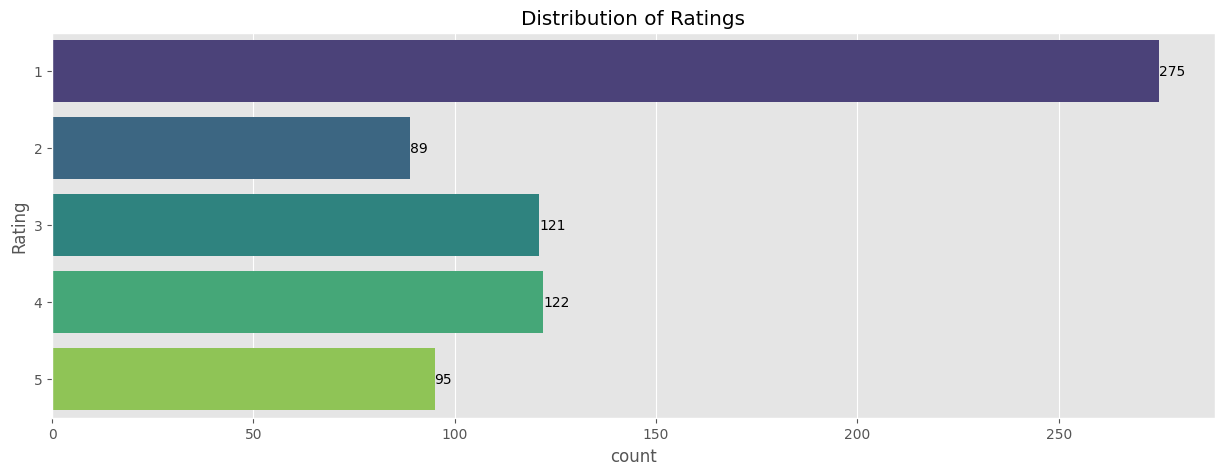

In [21]:
plt.figure( figsize = (15,5))

ax = sns.countplot( y = df["Rating"], palette = "viridis")

for i in ax.containers:
    ax.bar_label(i)

plt.title('Distribution of Ratings')
plt.show()

In [24]:
df["Review length"] = df["Review"].apply(len)

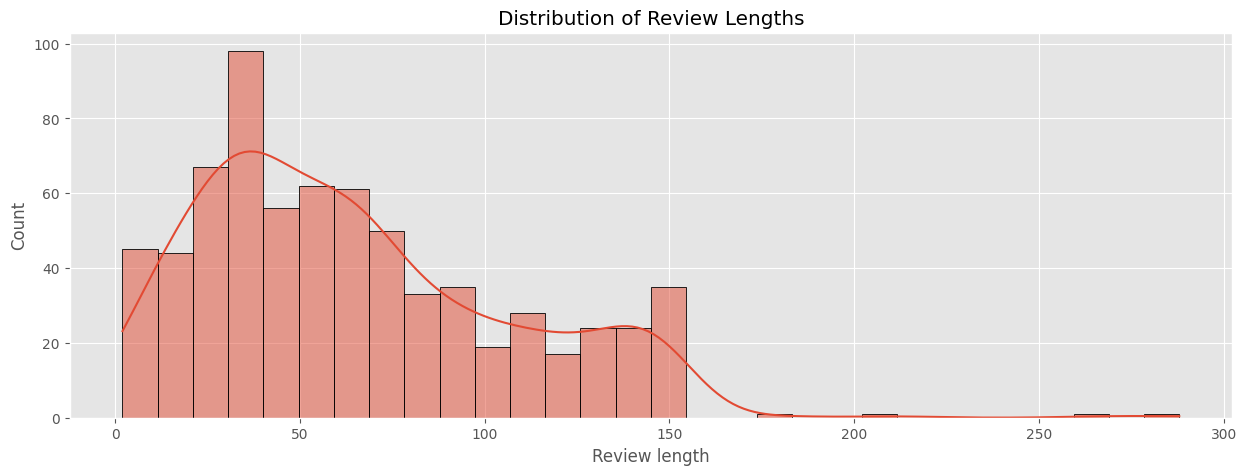

In [31]:
plt.figure( figsize = (15,5))

sns.histplot(df["Review length"], kde = True , bins = 30 , linewidth = 0.6, edgecolor = "k")

plt.title('Distribution of Review Lengths')
plt.show()

## Adding Sentiment Labels in the Data

the next step is to label the data with sentiments. We can use Textblob for this task. TextBlob provides a polarity score ranging from -1 (very negative) to 1 (very positive) for a given text. We can use this score to classify each review’s sentiment as positive, neutral, or negative.

In [32]:
pip install textblob

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
    --------------------------------------- 10.2/624.3 kB ? eta -:--:--
   ---- ----------------------------------- 71.7/624.3 kB 1.3 MB/s eta 0:00:01
   -------------------- ------------------- 327.7/624.3 kB 3.4 MB/s eta 0:00:01
   ---------------------------------------  614.4/624.3 kB 4.8 MB/s eta 0:00:01
   ---------------------------------------- 624.3/624.3 kB 3.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   -------------- ------------------------- 0.5/1.5 MB 11.3 MB/s eta 0:00:01
   -------------------------- ------------- 1.0/1.5 MB 9.1 MB/s eta 0:00:01
   ---------------------------------------  1.5/1.5 MB 10.5 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 8.7 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.8.1
    Uninstalling nltk-3.8.1:
      Successfully uninstalled nltk-3.8.1
Note: you may need 

In [42]:
from textblob import TextBlob

In [53]:
def text_sentiment(review):
    sentiment = TextBlob(review).sentiment

    if sentiment.polarity > 0.1:
        return "Positive"
    elif sentiment.polarity < - 0.1:
        return "Negative"
    else:
        return "Neutral"

In [54]:
df["sentiment"] = df["Review"].apply(text_sentiment)

In [55]:
df

,Review,Rating,Review length,sentiment
0,Does absolutely nothing for a LinkedIn beginne...,1,80,Negative
1,Force close(galaxy tab),1,23,Neutral
2,Slow and it tries to upload your contacts with...,1,61,Negative
3,Add ability to customize the profile and move ...,4,90,Neutral
4,"Good app, but it's a pain that it's not possib...",4,133,Positive
...,...,...,...,...
697,"Can't trust, Going to uninstall just for that ...",1,53,Neutral
698,It really gets me linked in with my friends. H...,5,72,Positive
699,It lacks most of what makes the other social n...,4,81,Positive
700,Really disappointed in the new version. Seems ...,2,123,Neutral


### Analyzing App Reviews Sentiments

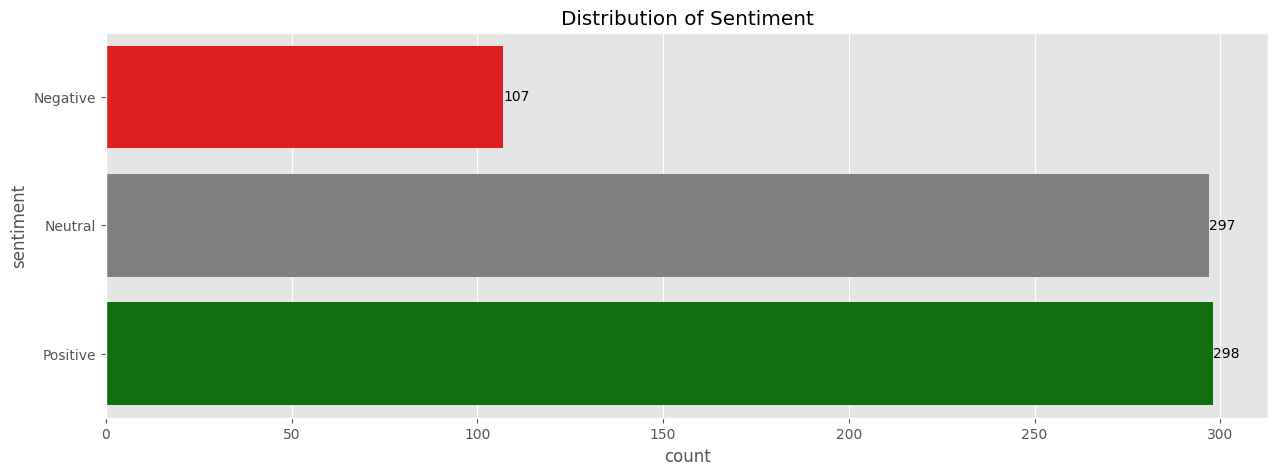

In [66]:
plt.figure( figsize = (15,5))

ax = sns.countplot(y = df["sentiment"], palette = ["red", "grey", "green"])

for i in ax.containers:
    ax.bar_label(i)

plt.title('Distribution of Sentiment')
plt.show()

In [76]:
rs = df.groupby(["Rating","sentiment"]).size().reset_index(name = "count")
rs.head()

,Rating,sentiment,count
0,1,Negative,70
1,1,Neutral,155
2,1,Positive,50
3,2,Negative,19
4,2,Neutral,42


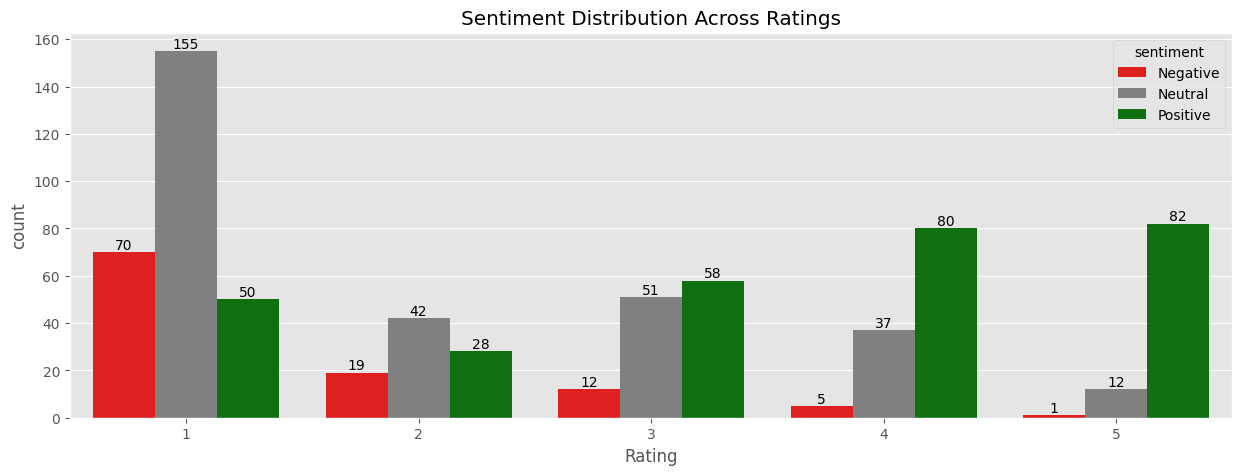

In [86]:
plt.figure( figsize = (15,5))

ax = sns.barplot( data = rs, x= "Rating", y = "count", hue = "sentiment", palette = ["red", "grey", "green"])

for i in ax.containers:
    ax.bar_label(i)

plt.title('Sentiment Distribution Across Ratings')
plt.show()

Now, let’s perform a text analysis to identify common words or themes within each sentiment category. It involves examining the most frequently occurring words in positive, negative, and neutral reviews using a word cloud:

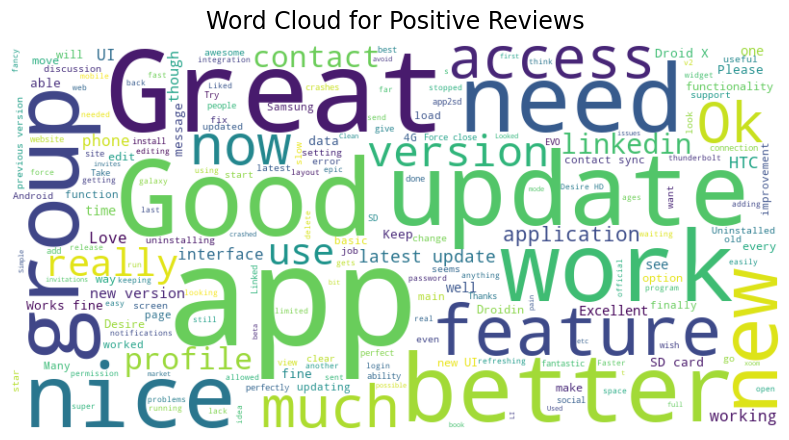

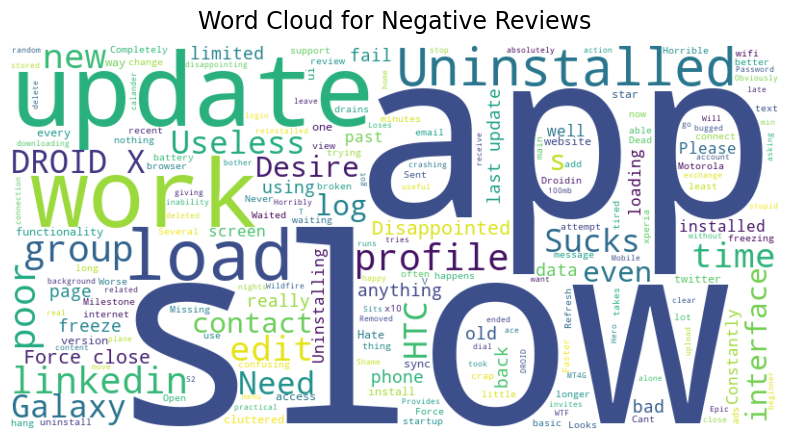

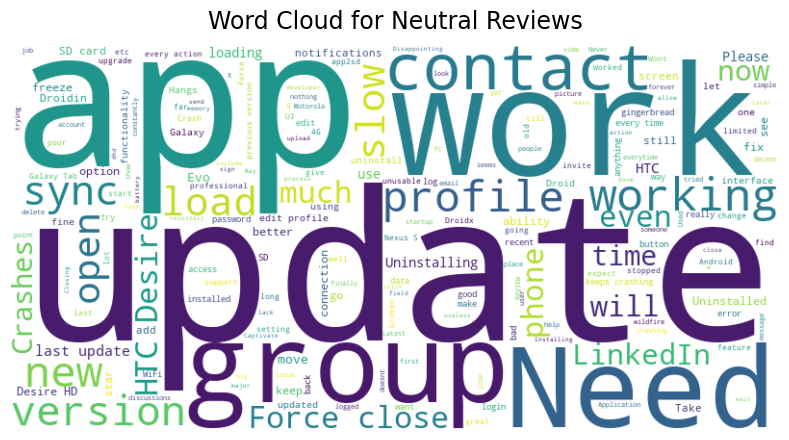

In [94]:
from wordcloud import WordCloud

# Function to generate word cloud for each sentiment
def generate_word_cloud(sentiment):
    text = ' '.join(review for review in df[df['sentiment'] == sentiment]['Review'])
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)
    plt.figure(figsize=(15, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Reviews', size = 17, y = 1.02 )
    plt.axis('off')
    plt.show()

# Generating word clouds for each sentiment
for sentiment in ['Positive', 'Negative', 'Neutral']:
    generate_word_cloud(sentiment)

### Summary

App Reviews Sentiment Analysis is a valuable tool for app developers and businesses to understand user feedback, prioritize feature updates, and maintain a positive user community. It involves using data analysis techniques to determine whether the sentiments in these reviews are positive, negative, or neutral.